# BT 1

In [6]:
!pwd

/mnt/c/Users/nguyenhung1903/Desktop/Data Science/Seaborn_data_EDA


In [101]:
data = []
for line in open("EDA/state.csv", "r"):
    data.append(line.strip().split(","))

In [102]:
data

[['State', 'Population', 'Murder.Rate', 'Abbreviation'],
 ['Alabama', '4779736', '5.7', 'AL'],
 ['Alaska', '710231', '5.6', 'AK'],
 ['Arizona', '6392017', '4.7', 'AZ'],
 ['Arkansas', '2915918', '5.6', 'AR'],
 ['California', '37253956', '4.4', 'CA'],
 ['Colorado', '5029196', '2.8', 'CO'],
 ['Connecticut', '3574097', '2.4', 'CT'],
 ['Delaware', '897934', '5.8', 'DE'],
 ['Florida', '18801310', '5.8', 'FL'],
 ['Georgia', '9687653', '5.7', 'GA'],
 ['Hawaii', '1360301', '1.8', 'HI'],
 ['Idaho', '1567582', '2', 'ID'],
 ['Illinois', '12830632', '5.3', 'IL'],
 ['Indiana', '6483802', '5', 'IN'],
 ['Iowa', '3046355', '1.9', 'IA'],
 ['Kansas', '2853118', '3.1', 'KS'],
 ['Kentucky', '4339367', '3.6', 'KY'],
 ['Louisiana', '4533372', '10.3', 'LA'],
 ['Maine', '1328361', '1.6', 'ME'],
 ['Maryland', '5773552', '6.1', 'MD'],
 ['Massachusetts', '6547629', '2', 'MA'],
 ['Michigan', '9883640', '5.4', 'MI'],
 ['Minnesota', '5303925', '1.6', 'MN'],
 ['Mississippi', '2967297', '8.6', 'MS'],
 ['Missouri', '59

In [103]:
data = data[1:]

In [104]:
data

[['Alabama', '4779736', '5.7', 'AL'],
 ['Alaska', '710231', '5.6', 'AK'],
 ['Arizona', '6392017', '4.7', 'AZ'],
 ['Arkansas', '2915918', '5.6', 'AR'],
 ['California', '37253956', '4.4', 'CA'],
 ['Colorado', '5029196', '2.8', 'CO'],
 ['Connecticut', '3574097', '2.4', 'CT'],
 ['Delaware', '897934', '5.8', 'DE'],
 ['Florida', '18801310', '5.8', 'FL'],
 ['Georgia', '9687653', '5.7', 'GA'],
 ['Hawaii', '1360301', '1.8', 'HI'],
 ['Idaho', '1567582', '2', 'ID'],
 ['Illinois', '12830632', '5.3', 'IL'],
 ['Indiana', '6483802', '5', 'IN'],
 ['Iowa', '3046355', '1.9', 'IA'],
 ['Kansas', '2853118', '3.1', 'KS'],
 ['Kentucky', '4339367', '3.6', 'KY'],
 ['Louisiana', '4533372', '10.3', 'LA'],
 ['Maine', '1328361', '1.6', 'ME'],
 ['Maryland', '5773552', '6.1', 'MD'],
 ['Massachusetts', '6547629', '2', 'MA'],
 ['Michigan', '9883640', '5.4', 'MI'],
 ['Minnesota', '5303925', '1.6', 'MN'],
 ['Mississippi', '2967297', '8.6', 'MS'],
 ['Missouri', '5988927', '6.6', 'MO'],
 ['Montana', '989415', '3.6', 'MT']

In [105]:
'State', 'Population', 'Murder.Rate', 'Abbreviation'

('State', 'Population', 'Murder.Rate', 'Abbreviation')

In [120]:
States = [ data[i][0] for i in range(len(data))]
Population = [ int(data[i][1]) for i in range(len(data))]
MurderRate = [ float(data[i][2]) for i in range(len(data))]
Abbreviation = [ data[i][3] for i in range(len(data))]

### Mean

In [121]:
def Mean(arr):
    return sum(arr)/len(arr)

In [122]:
print(f"Mean: {Mean(MurderRate)}")

Mean: 4.066


In [123]:
import numpy as np
print(np.mean(MurderRate))

4.066


### Trimmed Mean

In [124]:
def Trimmed_mean(arr, p=0.1):
    N = len(arr)
    p = int(round(N * p))
    return sum(arr[p + 1: N - p]) / (N - 2 * p)

In [125]:
print(f"Trimmed_mean: {Trimmed_mean(MurderRate, 0.1)}")

Trimmed_mean: 3.9575000000000005


In [126]:
from scipy import stats
stats.trim_mean(MurderRate, 0.1) # Trim 10% at both ends

3.9450000000000003

### Weighted mean

In [127]:
def Weighted_mean(X, W):
    return sum([w * x for w,x in zip(X, W)]) / sum(W)

In [134]:
print(Weighted_mean(X = MurderRate, W = Population))

4.445833981123394


In [129]:
print(np.average(MurderRate, weights=Population))


4.445833981123393


In [131]:
!pip install wquantiles

  Obtaining dependency information for wquantiles from https://files.pythonhosted.org/packages/f7/75/3cce30508bf46121b7cabce57b9cacbf8d935fa555cb3c5fca43f8dd0414/wquantiles-0.6-py3-none-any.whl.metadata


In [133]:
import wquantiles
print(wquantiles.median(np.array(MurderRate), weights=np.array(Population)))

4.4


### Median

In [115]:
def Median(arr):
    arr.sort()
    N = len(arr)
    return (arr[N//2] + arr[N//2 - 1])/2 if N % 2 == 0 else arr[N//2]

In [116]:
print(f"Median: {Median(MurderRate)}")

Median: 4.0


In [117]:
np.median(MurderRate)

4.0

# BT2

In [135]:
# Độ lệch tuyệt đối trung bình: là GTTB của độ lệch tuyệt đối
# requested by the mean

def MAD(arr):
    return Mean([abs(x - Mean(arr)) for x in arr])

print(f"MAD: {MAD(MurderRate)}")

MAD: 1.5526400000000005


In [136]:
# Phương sai: là GTTB của độ lệch bình phương

def Variance(arr):
    return Mean([(x - Mean(arr))**2 for x in arr])

print(f"Variance: {Variance(MurderRate)}")

Variance: 3.5966440000000004


In [137]:
def Variance2(arr):
    return sum([(x - Mean(arr))**2 for x in arr])/len(arr)

In [138]:
print(f"Variance: {Variance2(MurderRate)}")

Variance: 3.5966440000000004


In [141]:
# Độ lệch chuẩn: là căn bậc hai của phương sai, thường được dùng phổ biến nhất nhưng nhạy với giá trị ngoại lệ
# required by the Variance
import math
def Standard_deviation(arr):
    return math.sqrt(Variance(arr))

print(f"Standard_deviation: {Standard_deviation(MurderRate)}")

Standard_deviation: 1.8964820062420842


In [142]:
# Median absolute deviation

def MAD2(arr):
    return Median([abs(x - Median(arr)) for x in arr])

print(f"MAD2: {MAD2(MurderRate)}")

MAD2: 1.5999999999999996


### Inter quartile range

In [155]:
# Interquartile range

def percentile(arr, p):
    arr = [abs(x) for x in arr]
    arr = sorted(arr)
    N = len(arr)
    return arr[int(N * p)]

def IQR(arr):
    arr.sort()
    return percentile(arr, 0.75) - percentile(arr, 0.25)

print(f"IQR: {IQR(MurderRate)}")

IQR: 3.1999999999999997


In [153]:
q75, q25 = np.percentile(MurderRate, [75 ,25])
iqr = q75 - q25
iqr

3.125

In [144]:
from scipy.stats import iqr
iqr(MurderRate)

3.125

## Plot

In [159]:
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]

In [160]:
[np.percentile(MurderRate, p) for p in percentiles]

[0.91715, 0.98575, 1.0715000000000001, 1.1572500000000001, 1.22585]

In [161]:
[percentile(MurderRate, p) for p in percentiles]

[1.6, 2.4, 4.0, 5.6, 6.6]

In [162]:
import seaborn as sns

<AxesSubplot:>

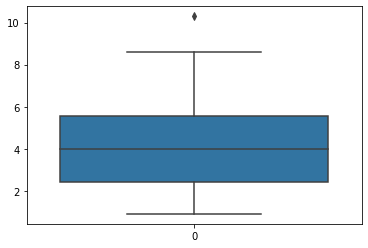

In [179]:
sns.boxplot(MurderRate)

<AxesSubplot:>

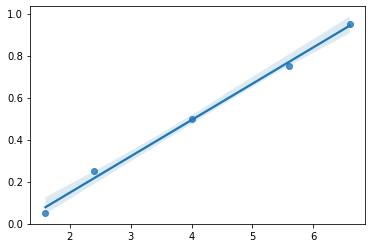

In [174]:
sns.regplot(x = [percentile(MurderRate, p) for p in percentiles], y = percentiles)
# đây là hàm tích lũy

In [182]:
# Frequency table (bảng tần xuất)

def Frequency_table(arr):
    freq = {}
    for x in arr:
        freq[x] = freq.get(x, 0) + 1
    return freq

Frequency_table(MurderRate)


{0.9: 1,
 1.6: 3,
 1.8: 1,
 1.9: 1,
 2.0: 3,
 2.3: 2,
 2.4: 2,
 2.5: 1,
 2.7: 1,
 2.8: 1,
 2.9: 2,
 3.0: 1,
 3.1: 2,
 3.6: 2,
 3.9: 1,
 4.0: 2,
 4.1: 1,
 4.4: 2,
 4.5: 1,
 4.7: 1,
 4.8: 2,
 5.0: 1,
 5.1: 1,
 5.3: 1,
 5.4: 1,
 5.6: 2,
 5.7: 3,
 5.8: 2,
 6.0: 1,
 6.1: 1,
 6.4: 1,
 6.6: 1,
 8.6: 1,
 10.3: 1}

<ipython-input-183-245265eeda65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MurderRate, bins=10, kde=False)


<AxesSubplot:>

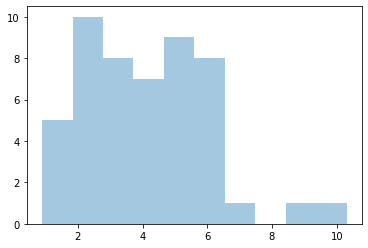

In [183]:
sns.distplot(MurderRate, bins=10, kde=False)

<ipython-input-185-eabad54994a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Population, bins=10, kde=True)


<AxesSubplot:ylabel='Density'>

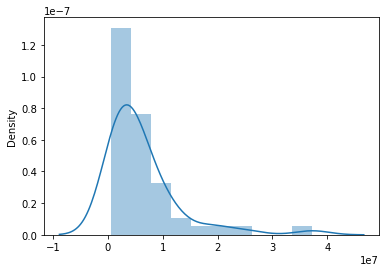

In [185]:
sns.distplot(Population, bins=10, kde=True)

<ipython-input-187-dc32304da0cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MurderRate, bins=10, kde=True, norm_hist=True)


<AxesSubplot:ylabel='Density'>

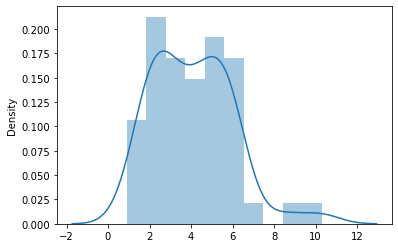

In [187]:
sns.distplot(MurderRate, bins=10, kde=True, norm_hist=True)

<ipython-input-186-7bd604f003ba>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(MurderRate, shade=True)


<AxesSubplot:ylabel='Density'>

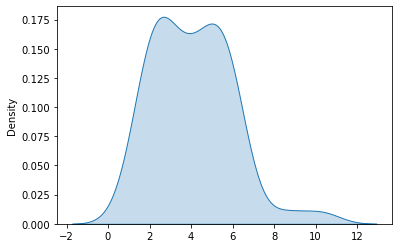

In [186]:
# Density plot (đồ thị mật độ)

sns.kdeplot(MurderRate, shade=True)

In [188]:
# Tương quan (Correlation)

def Correlation(X, Y):
    return sum([(x - Mean(X)) * (y - Mean(Y)) for x, y in zip(X, Y)]) / (len(X) - 1) / Standard_deviation(X) / Standard_deviation(Y)

In [189]:
Correlation(MurderRate, Population)

-0.11171537171064416

In [190]:
# Sai số chuẩn (Standard error)

def Standard_error(arr):
    return Standard_deviation(arr) / math.sqrt(len(arr))

Standard_error(MurderRate)

0.2682030574024092

In [192]:
np.array(MurderRate).std() / math.sqrt(len(MurderRate))

0.2682030574024092

# Bootstrap Method

In [193]:
def bootstrap_method(arr, B=1000):
    N = len(arr)
    means = []
    for i in range(B):
        sample = [arr[j] for j in np.random.randint(0, N, N)]
        means.append(Mean(sample))
    return means

bootstrap_means = bootstrap_method(MurderRate)

<ipython-input-199-302a261f9973>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bootstrap_means, bins=30, kde=True)


<AxesSubplot:ylabel='Density'>

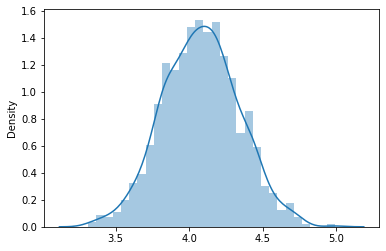

In [199]:
sns.distplot(bootstrap_means, bins=30, kde=True)